       Exploratory Data Analysis
Exploratory data analysis (EDA) is a process of summarizing and visualizing data to understand
its underlying patterns, relationships, and structures. EDA is an essential step in data science
because it helps identify potential issues, outliers, and correlations that can inform the
modeling process.

In [20]:
import os
import numpy as np 
import pandas as pd

In [4]:
print("Current Working Directory:", os.getcwd())

Current Working Directory: c:\Users\Albin\Customer-Behavior-Churn-Prediction\notebooks


In [6]:
os.chdir(r"c:\Users\Albin\Customer-Behavior-Churn-Prediction"
)

In [7]:
cleaned_data_path = "data/processed/cleaned_bigbasket_products.csv"
df_cleaned = pd.read_csv(cleaned_data_path)

In [8]:
print(f"Rows: {df_cleaned.shape[0]}, Columns: {df_cleaned.shape[1]}")


Rows: 27553, Columns: 10


In [9]:
print(df_cleaned.head())


   index                                            product  \
0      1             Garlic Oil - Vegetarian Capsule 500 mg   
1      2                              Water Bottle - Orange   
2      3                     Brass Angle Deep - Plain, No.2   
3      4  Cereal Flip Lid Container/Storage Jar - Assort...   
4      5                 Creme Soft Soap - For Hands & Body   

                 category           sub_category              brand  \
0        Beauty & Hygiene              Hair Care  Sri Sri Ayurveda    
1  Kitchen, Garden & Pets  Storage & Accessories         Mastercook   
2    Cleaning & Household            Pooja Needs                Trm   
3    Cleaning & Household   Bins & Bathroom Ware             Nakoda   
4        Beauty & Hygiene       Bath & Hand Wash              Nivea   

   sale_price  market_price                      type rating  \
0       220.0         220.0          Hair Oil & Serum    4.1   
1       180.0         180.0    Water & Fridge Bottles    2.3   
2 

In [10]:
df_cleaned[['sale_price', 'market_price', 'rating']].describe()


,sale_price,market_price
count,27553.000000,27553.000000
mean,322.529145,382.073872
std,486.277432,581.747762
min,2.450000,3.000000
25%,95.000000,100.000000
50%,190.000000,220.000000
75%,359.000000,425.000000
max,12500.000000,12500.000000


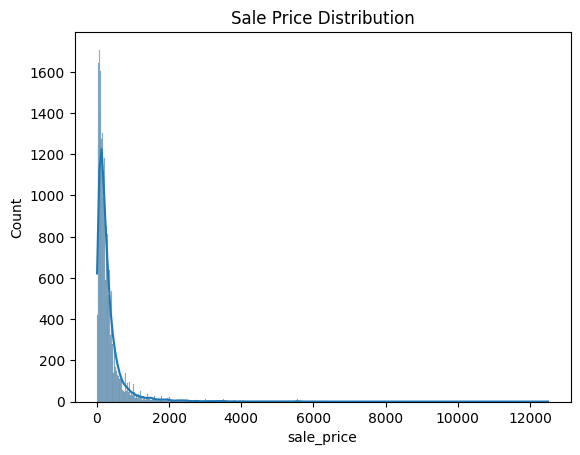

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_cleaned['sale_price'], kde=True)
plt.title('Sale Price Distribution')
plt.show()


In [13]:
print(df_cleaned['category'].value_counts())
print(df_cleaned['sub_category'].value_counts())
print(df_cleaned['type'].value_counts())


category
Beauty & Hygiene            7867
Gourmet & World Food        4690
Kitchen, Garden & Pets      3580
Snacks & Branded Foods      2814
Foodgrains, Oil & Masala    2676
Cleaning & Household        2674
Beverages                    884
Bakery, Cakes & Dairy        851
Baby Care                    610
Fruits & Vegetables          557
Eggs, Meat & Fish            350
Name: count, dtype: int64
sub_category
Skin Care                   2294
Health & Medicine           1133
Hair Care                   1028
Storage & Accessories       1015
Fragrances & Deos           1000
                            ... 
Mutton & Lamb                 20
Water                         17
Flower Bouquets, Bunches       8
Pork & Other Meats             5
Marinades                      1
Name: count, Length: 90, dtype: int64
type
Face Care                1508
Ayurveda                  538
Men's Deodorants          500
Shampoo & Conditioner     461
Glassware                 415
                         ... 
Bag

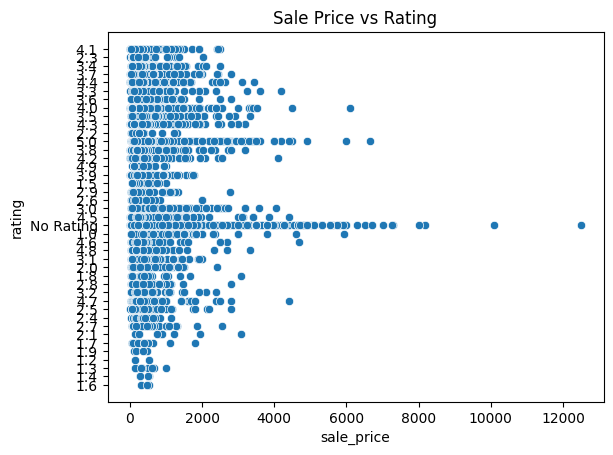

In [14]:
sns.scatterplot(data=df_cleaned, x='sale_price', y='rating')
plt.title('Sale Price vs Rating')
plt.show()


C:\Users\Albin\AppData\Local\Temp\ipykernel_25196\1882371829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['rating'] = df_filtered['rating'].astype(float)


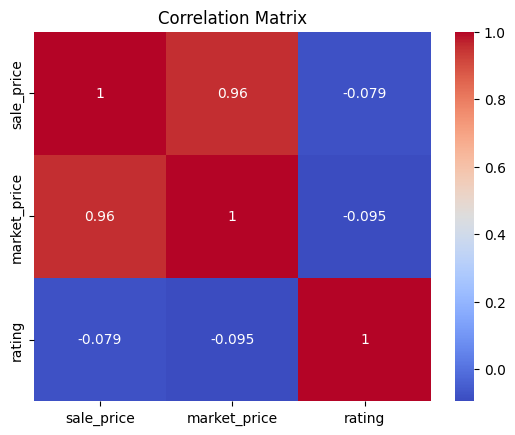

In [17]:
df_filtered = df_cleaned[df_cleaned['rating'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
df_filtered['rating'] = df_filtered['rating'].astype(float)
corr_matrix = df_filtered[['sale_price', 'market_price', 'rating']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


             Feature Engineering
Feature engineering is the process of selecting and transforming raw data into features that can be used by a machine Learning Model .
Feature engineering is a crucial step in the machine learning pipeline, as it can significantly impact the performance of the model. Here are some common techniques used in feature engineering:


In [21]:
df_cleaned['price_difference'] = df_cleaned['market_price'] - df_cleaned['sale_price']


In [22]:
df_cleaned['discount_percentage'] = (
    (df_cleaned['price_difference'] / df_cleaned['market_price']) * 100
)


In [25]:
# Separate rows with 'No Rating'
df_no_rating = df_cleaned[df_cleaned['rating'] == 'No Rating']

# Filter and convert numeric ratings
df_with_ratings = df_cleaned[df_cleaned['rating'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
df_with_ratings['rating'] = df_with_ratings['rating'].astype(float)

# Print results for verification
print("Rows with 'No Rating':", len(df_no_rating))
print("Rows with numeric ratings:", len(df_with_ratings))


Rows with 'No Rating': 8625
Rows with numeric ratings: 18928


C:\Users\Albin\AppData\Local\Temp\ipykernel_25196\3073842593.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_ratings['rating'] = df_with_ratings['rating'].astype(float)


In [26]:
enhanced_data_path = "data/processed/enhanced_bigbasket_products.csv"
df_cleaned.to_csv(enhanced_data_path, index=False)
print(f"Enhanced dataset saved at: {enhanced_data_path}")


Enhanced dataset saved at: data/processed/enhanced_bigbasket_products.csv
